In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.utils import resample

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Assignment3

/content/drive/MyDrive/Assignment3


In [ ]:
train_df = pd.read_csv('train-3.csv')
test_df = pd.read_csv('test-4.csv')

In [ ]:
train_Y = train_df['TYPE']
train_X = train_df.drop(columns=['TYPE'])

In [ ]:
train_X.shape

(40007, 20)

In [ ]:
train_df.head()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,1,0,1,1,0,1,0,0,0,0,...,0,1,1,1,1,1,0,1,1,ALLERGY
1,1,1,0,0,1,0,0,0,1,1,...,1,1,1,0,0,0,0,1,0,FLU
2,1,1,0,0,1,1,0,0,0,0,...,0,1,1,0,0,0,1,0,1,ALLERGY
3,1,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,FLU
4,1,0,1,1,1,1,1,1,1,0,...,1,0,0,0,0,0,0,1,0,FLU


In [ ]:
test_df.head()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,1,1,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,FLU
1,1,0,1,0,0,1,0,0,0,1,...,1,1,0,0,0,0,0,1,0,FLU
2,0,1,1,1,1,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,FLU
3,0,1,1,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,FLU
4,1,0,1,1,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,FLU


In [ ]:
train_df.describe()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
count,40007.000000,40007.000000,40007.000000,40007.000000,40007.000000,40007.000000,40007.000000,40007.000000,40007.000000,40007.000000,40007.000000,40007.000000,40007.000000,40007.000000,40007.000000,40007.000000,40007.000000,40007.000000,40007.000000,40007.000000
mean,0.521709,0.520559,0.518509,0.519034,0.496113,0.495488,0.323943,0.324518,0.324143,0.323168,0.324443,0.324168,0.421526,0.423376,0.183943,0.184468,0.183343,0.184618,0.520584,0.183993
std,0.499535,0.499583,0.499664,0.499644,0.499991,0.499986,0.467985,0.468200,0.468060,0.467692,0.468172,0.468069,0.493810,0.494100,0.387442,0.387870,0.386952,0.387992,0.499582,0.387483
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
test_df.describe()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
count,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000
mean,0.511246,0.512596,0.532389,0.522267,0.497301,0.499100,0.338507,0.321862,0.327935,0.326136,0.318938,0.327036,0.436122,0.421952,0.187359,0.182636,0.192758,0.181287,0.507872,0.186460
std,0.499930,0.499898,0.499006,0.499560,0.500049,0.500055,0.473255,0.467243,0.469514,0.468850,0.466118,0.469183,0.495959,0.493927,0.390244,0.386411,0.394509,0.385299,0.499994,0.389521
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


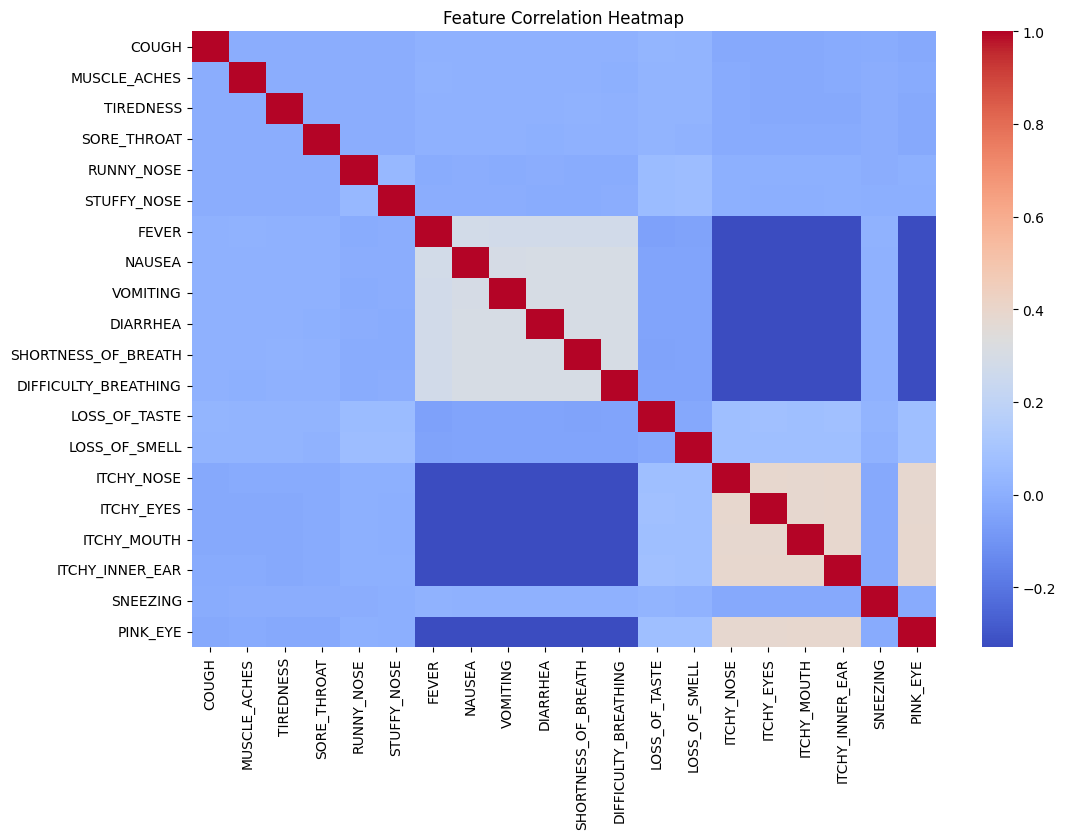

In [ ]:
#correlation visualization
correlation_matrix = train_X.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
train_df.isna().sum()

,0
COUGH,0
MUSCLE_ACHES,0
TIREDNESS,0
SORE_THROAT,0
RUNNY_NOSE,0
STUFFY_NOSE,0
FEVER,0
NAUSEA,0
VOMITING,0
DIARRHEA,0


In [ ]:
test_df.isna().sum()

,0
COUGH,0
MUSCLE_ACHES,0
TIREDNESS,0
SORE_THROAT,0
RUNNY_NOSE,0
STUFFY_NOSE,0
FEVER,0
NAUSEA,0
VOMITING,0
DIARRHEA,0


In [ ]:
#checking for data imbalance
train_df['TYPE'].value_counts()/len(train_df)

,count
TYPE,
FLU,0.562377
ALLERGY,0.368161
COVID,0.046217
COLD,0.023246


We see that there is a very large amount data imbalance present in the dataset, where FLU has more amount of data and Cold has the least amount of data present in the dataset

# Hybrid sampling

To address the issue of class imbalance in the training dataset, a combined approach of undersampling and SMOTE (Synthetic Minority Oversampling Technique) was implemented. The majority classes, "FLU" and "ALLERGY," were undersampled to 10,000 samples each to reduce their dominance, ensuring that the model does not become biased towards them. For the minority classes, "COVID" and "COLD," SMOTE was used to generate synthetic samples, increasing their representation to 5,000 samples each. This hybrid approach maintains a balanced dataset while avoiding potential discrepancies caused by solely relying on synthetic data for smaller classes. By combining actual data from undersampling with synthetic data generated for minority classes, the final dataset achieves a more equitable distribution across all classes, allowing the model to generalize better during predictions.

In [ ]:
#Hybridsampling
flu = train_df[train_df['TYPE'] == 'FLU']
allergy = train_df[train_df['TYPE'] == 'ALLERGY']
covid = train_df[train_df['TYPE'] == 'COVID']
cold = train_df[train_df['TYPE'] == 'COLD']

# undersampling the majority classes
flu_under = resample(flu, replace = False, n_samples= 10000, random_state = 42)
allergy_under = resample(allergy, replace = False, n_samples= 10000, random_state = 42)

majority = pd.concat([flu_under, allergy_under])
minority = pd.concat([covid, cold])
minority_x = minority.drop(columns = ['TYPE'])
minority_y = minority['TYPE']

# Smote for synthetically generating samples for minority classes
smote = SMOTE(sampling_strategy= {'COVID': 5000, 'COLD': 5000}, random_state = 42)
minority_over_x, minority_over_y = smote.fit_resample(minority_x, minority_y)

minority_over = pd.concat([minority_over_x, minority_over_y], axis = 1)

# combining undersampled + oversampled data
final_df = pd.concat([majority, minority_over])
final_df.shape

print(final_df['TYPE'].value_counts()/len(final_df['TYPE']))

final_train_x = final_df.drop(columns = ['TYPE'])
final_train_y = final_df['TYPE']

TYPE
FLU        0.333333
ALLERGY    0.333333
COVID      0.166667
COLD       0.166667
Name: count, dtype: float64


In [ ]:
# checking data imbalance in the test_data
test_df['TYPE'].value_counts()/len(test_df['TYPE'])

,count
TYPE,
FLU,0.562528
ALLERGY,0.371570
COVID,0.044759
COLD,0.021143


In [ ]:
test_X = test_df.drop(columns= ['TYPE'])
test_y = test_df['TYPE']

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf_params = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
skf = StratifiedKFold(n_splits = 7, shuffle = True, random_state = 42)

In [ ]:
random_search_rf = RandomizedSearchCV(estimator = rf, param_distributions= rf_params, scoring = 'f1_weighted', cv = skf, n_jobs = -1, verbose = 1, n_iter= 100)
random_search_rf.fit(final_train_x, final_train_y)

Fitting 7 folds for each of 100 candidates, totalling 700 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=7, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500]},
                   scoring='f1_weighted', verbose=1)

In [ ]:
best_param_rf =  random_search_rf.best_estimator_
best_param_rf

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=500)

In [ ]:
best_param_rf

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=500)

In [ ]:
print(random_search_rf.best_score_)

0.9536949313573001


In [ ]:
y_pred_rf = best_param_rf.predict(test_X)

In [ ]:
accuracy = accuracy_score(y_pred_rf, test_y)
precision = precision_score(y_pred_rf, test_y, average = "macro")
recall = recall_score(y_pred_rf, test_y, average = "macro")
f1 = f1_score(y_pred_rf, test_y, average = "macro")
print(accuracy)
print(precision)
print(recall)
print(f1)

0.9260008996851102
0.9572470393131759
0.7307471264367815
0.7956793437928156


In [ ]:
cm_rf = confusion_matrix(y_pred_rf, test_y)
cm_rf

array([[1595,    0,    0,    0],
       [  57,   94,    6,   53],
       [   0,    0,  193,  213],
       [   0,    0,    0, 2235]], dtype=int64)

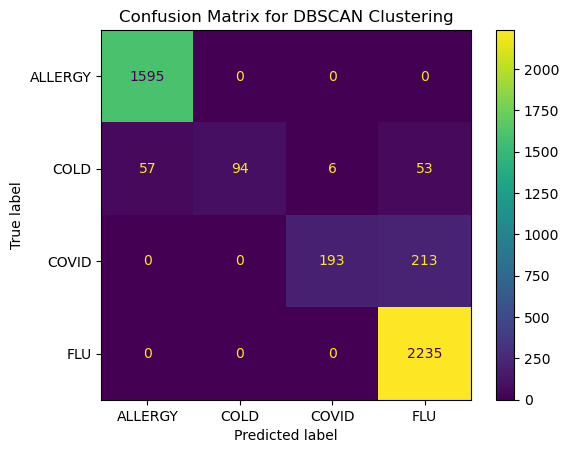

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=np.unique(test_y))
disp.plot(cmap='viridis', colorbar=True)
plt.title("Confusion Matrix for DBSCAN Clustering")
plt.show()

# Approach with KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],            # Number of neighbors
    'weights': ['uniform', 'distance'],         # Weighting scheme
    'metric': ['euclidean', 'manhattan', 'minkowski', 'hamming'],  # Distance metrics
    'p': [1, 2]                                 # Power parameter for Minkowski distance
}

In [ ]:
random_search_knn = RandomizedSearchCV(estimator=knn, param_distributions=param_grid_knn,
                                   n_iter=10, cv=skf, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)

# Perform the randomized search
random_search_knn.fit(final_train_x, final_train_y)

Fitting 7 folds for each of 10 candidates, totalling 70 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=7, random_state=42, shuffle=True),
                   estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski', 'hamming'],
                                        'n_neighbors': [3, 5, 7, 9, 11],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
# Get the best parameters and score
print("Best Parameters:", random_search_knn.best_params_)
print("Best Cross-Validation Accuracy:", random_search_knn.best_score_)

# Test the model with the best parameters
best_knn = random_search_knn.best_estimator_
y_pred_knn = random_search_knn.predict(test_X)

Best Parameters: {'weights': 'uniform', 'p': 2, 'n_neighbors': 11, 'metric': 'euclidean'}
Best Cross-Validation Accuracy: 0.9087668290025317


In [ ]:
accuracy_knn = accuracy_score(test_y, y_pred_knn)
precision_knn = precision_score(test_y, y_pred_knn, average='macro')
recall_knn = recall_score(test_y, y_pred_knn, average='macro')
f1_score_knn = f1_score(test_y, y_pred_knn, average='macro')

In [ ]:
print(f"K nearest metrics \n Accuracy: {accuracy_knn}\n Precision: {precision_knn}\n Recall: {recall_knn} \n F1 SCore: {f1_score_knn} ")

K nearest metrics 
 Accuracy: 0.8663967611336032
 Precision: 0.6548360991256618
 Recall: 0.9120662417482915 
 F1 SCore: 0.6972285746158464 


In [ ]:
cm_rf = confusion_matrix(y_pred_knn, test_y)
cm_rf

array([[1543,    2,    0,    0],
       [ 107,   90,    8,  170],
       [   2,    2,  188,  300],
       [   0,    0,    3, 2031]])

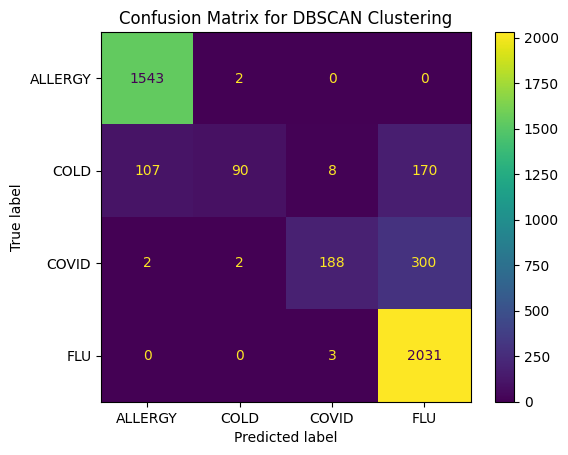

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=np.unique(test_y))
disp.plot(cmap='viridis', colorbar=True)
plt.title("Confusion Matrix for DBSCAN Clustering")
plt.show()

# Clustering Approach

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
Y = train_df['TYPE']
X = train_df.drop(columns = ['TYPE'])

In [ ]:
X.head()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
0,1,0,1,1,0,1,0,0,0,0,0,0,1,1,1,1,1,0,1,1
1,1,1,0,0,1,0,0,0,1,1,0,1,1,1,0,0,0,0,1,0
2,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1
3,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,1,0


In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5, metric = 'hamming')
dbscan_labels = dbscan.fit_predict(X)

In [ ]:
set(dbscan_labels)

{0}

Here we can notice that dbscan only finds out only one cluster for the given train_df dataset. This could be because of the reason that the 4 types of classes are quite similar to each other can cannot be seperable to each other. we can also check this out with the help of cosine_similarity. Wee can understand how similar are any random point from each of the 4 different classes

In [ ]:
va1 = train_df[train_df['TYPE']  == 'COVID']
va2 = train_df[train_df['TYPE']  == 'ALLERGY']
va3 = train_df[train_df['TYPE'] == 'FLU']
va4 = train_df[train_df['TYPE'] == 'COLD']


In [ ]:
t1 = va1.drop(columns = ['TYPE']).reset_index()[0:1]
t2 = va2.drop(columns = ['TYPE']).reset_index()[51:52]
t1_ar = np.array(t1)
t2_ar = np.array(t2)

In [ ]:
cosine_similarity(t1_ar, t2_ar) # Covid vs Allergy

array([[0.99371801]])

In [ ]:
t1 = va1.drop(columns = ['TYPE']).reset_index()[0:1]
t2 = va3.drop(columns = ['TYPE']).reset_index()[10:11]
t1_ar = np.array(t1)
t2_ar = np.array(t2)
cosine_similarity(t1_ar, t2_ar) # Covid vs Flu

array([[0.98338409]])

In [ ]:
t1 = va1.drop(columns = ['TYPE']).reset_index()[0:1]
t2 = va4.drop(columns = ['TYPE']).reset_index()[100:101]
t1_ar = np.array(t1)
t2_ar = np.array(t2)
cosine_similarity(t1_ar, t2_ar) # Covid vs Cold

array([[0.99314586]])

Since all the column values in the dataset are binary (0 or 1), we decided to use DBSCAN and Agglomerative Clustering with Hamming distance as the similarity metric. Hamming distance is well-suited for binary data as it calculates the number of positions where the corresponding values differ, making it a natural choice for datasets with one-hot encoded features.

Upon applying DBSCAN, the output contained only a single cluster label. This is because the four classes—FLU, ALLERGY, COVID, and COLD—have highly similar feature representations in the binary space. This similarity can be further illustrated by calculating the cosine similarity between random rows from these classes, which shows a high similarity score, confirming that the classes overlap significantly in feature space. Due to this inherent similarity, DBSCAN fails to separate the data into distinct clusters and instead identifies the dataset as a single dense clusteace.

Calculating cosine similarity between two random rows from different classes (e.g., COVID vs. COLD) is a meaningful way to quantify their similarity in the binary feature space. Since all values are 0 or 1 with no outliers or missing data, cosine similarity effectively captures the overlap in feature patterns. A high similarity score indicates that the feature vectors for these classes are highly aligned, reinforcing the observation that the categories are inherently similar and challenging to differentiate using clustering.

In [ ]:
agglomerative = AgglomerativeClustering(n_clusters = 4, metric= 'hamming', linkage = 'average')
agglo_labels = agglomerative.fit_predict(X)

In [ ]:
set(agglo_labels)

{0, 1, 2, 3}

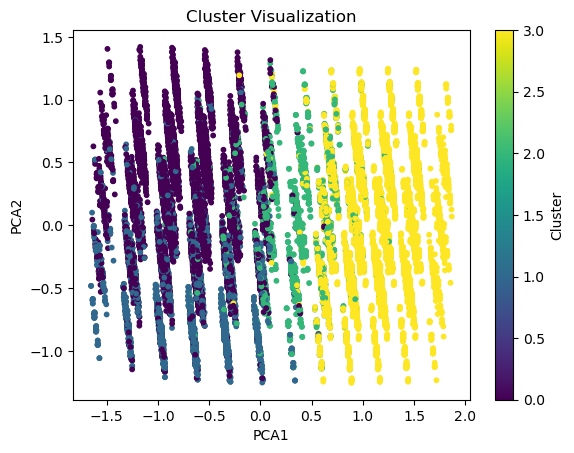

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=agglo_labels, s=10)
plt.title("Cluster Visualization")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
agglo_ari = adjusted_rand_score(Y, agglo_labels)

In [ ]:
agglo_ari

0.587803324676025

In [ ]:
agglo_silhouette = silhouette_score(X, agglo_labels)
agglo_silhouette

0.03126623374127827

With Agglomerative Clustering, we forcefully specified four clusters (n_clusters=4). However, the resulting clusters still reflect the challenges of separating the data meaningfully. The Silhouette Score was very low (0.03), indicating poorly defined clusters, and the Adjusted Rand Index (ARI) was moderate (0.58), suggesting some overlap with the ground truth labels but not a strong alignment. These metrics align with the observation that the classes share a high degree of similarity, explaining why clustering algorithms struggle to differentiate them effectively in this binary space.